# Feedback Emotion Recognition for Betterment in Customer Service

In [1]:
%pip install seaborn
%pip install neattext


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

def plot_roc_curve(y_true, y_pred_proba, classes):
    y_true_bin = label_binarize(y_true, classes=classes)
    n_classes = y_true_bin.shape[1]

    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


In [3]:
import matplotlib.pyplot as plt

def plot_training_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

### Loading the dataset

In [5]:
df = pd.read_csv("emotion_dataset.csv")

In [6]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [7]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [8]:
import seaborn as sns
import pandas as pd


### Data pre-processing

In [9]:
import neattext.functions as nfx

# Remove the user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [10]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [11]:
# Remove the stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [12]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


### Splitting data into input variables and target variable

x: Features are the attributes and variables extracted from the dataset. These extracted features are used as inputs to the model during training.

y: Labels are the output or the target variable.

In [13]:
x = df['Clean_Text']
y = df['Emotion']

### Splitting data into train and test set

We need to split our dataset into a train set and test set. The model will learn from the train set. We will use the test set to evaluate the model performance and measure the model’s knowledge capability.

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Training the model

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [35]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

0.631247422877946


C:\Users\KISHORE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
C:\Users\KISHORE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KISHORE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic

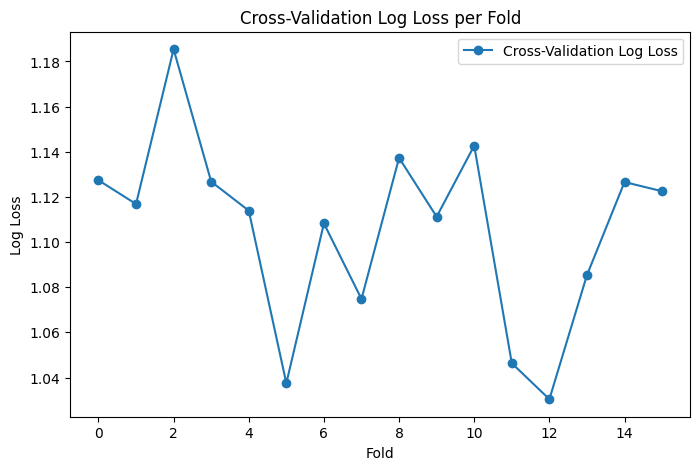

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss, make_scorer
import numpy as np

# Define a custom log-loss scorer
log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Run cross-validation to get loss for each fold
losses = cross_val_score(pipe_lr, x_train, y_train, scoring=log_loss_scorer, cv=16)

# Plotting the loss across folds
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(np.abs(losses), marker='o', label='Cross-Validation Log Loss')
plt.xlabel('Fold')
plt.ylabel('Log Loss')
plt.title('Cross-Validation Log Loss per Fold')
plt.legend()
plt.show()



C:\Users\KISHORE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


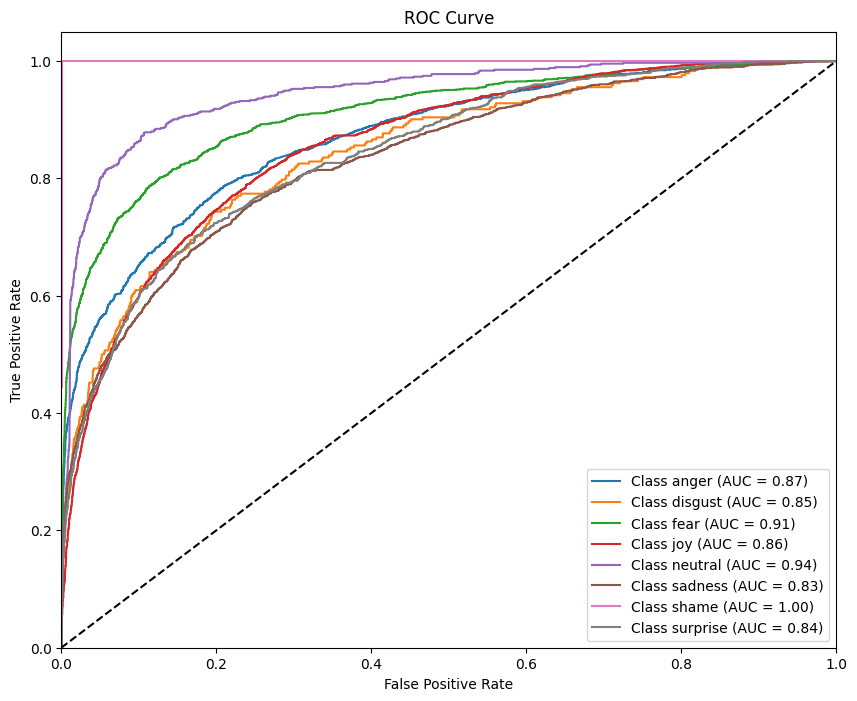

In [18]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Train the model and predict probabilities
pipe_lr.fit(x_train, y_train)
y_pred_proba = pipe_lr.predict_proba(x_test)

# Binarize y_test for multi-class ROC
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [36]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.5385172063613719


Model Accuracy: 0.5809742779134933


C:\Users\KISHORE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


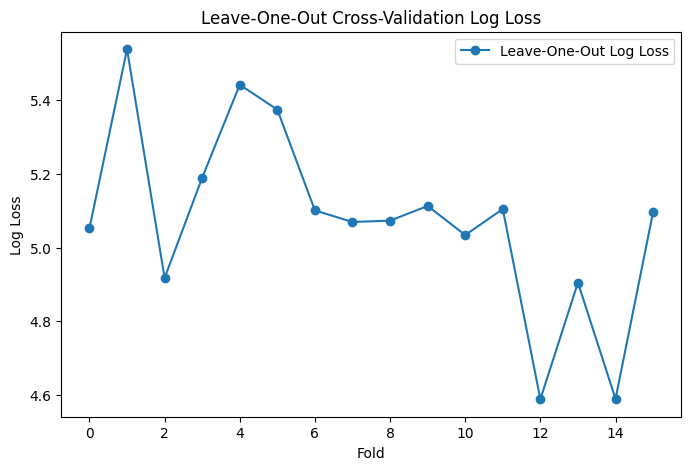

In [20]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.metrics import log_loss, make_scorer
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Assuming you have your features and labels in x and y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Define the pipeline
pipe_rf = Pipeline(steps=[('cv', CountVectorizer()), ('rf', RandomForestClassifier(n_estimators=10))])

# Fit the model
pipe_rf.fit(x_train, y_train)

# Score the model on the test set
print("Model Accuracy:", pipe_rf.score(x_test, y_test))

# Define a custom log-loss scorer
log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# If you have very few samples, use Leave-One-Out Cross-Validation (LOO CV)
# loo = LeaveOneOut()
losses = cross_val_score(pipe_rf, x_train, y_train, scoring=log_loss_scorer, cv=16)

# Plotting the loss across folds
plt.figure(figsize=(8, 5))
plt.plot(np.abs(losses), marker='o', label='Leave-One-Out Log Loss')
plt.xlabel('Fold')
plt.ylabel('Log Loss')
plt.title('Leave-One-Out Cross-Validation Log Loss')
plt.legend()
plt.show()


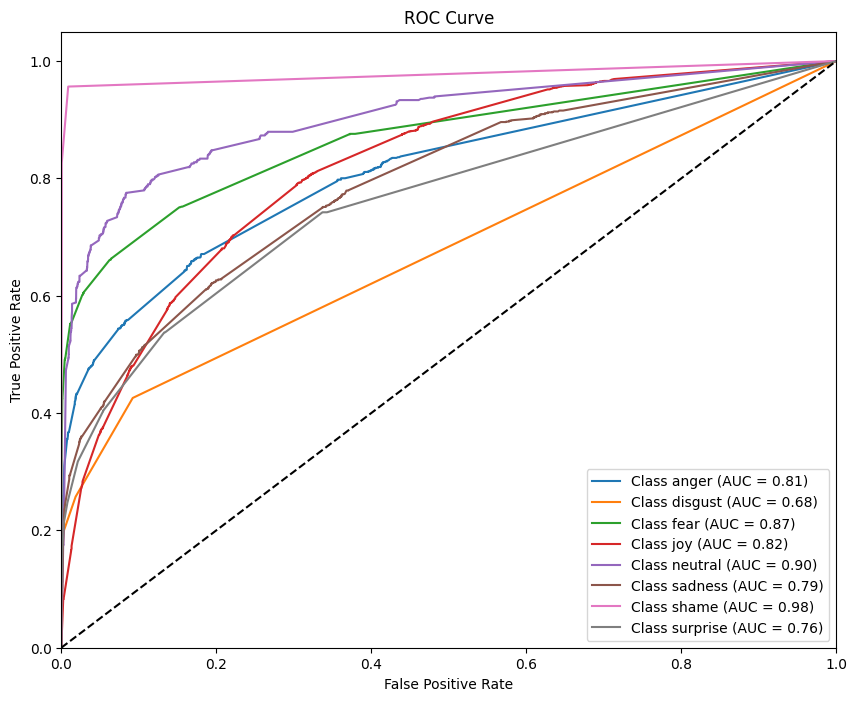

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Train the model and predict probabilities
pipe_rf.fit(x_train, y_train)
y_pred_proba = pipe_rf.predict_proba(x_test)

# Binarize y_test for multi-class ROC
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [34]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'rbf', C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.62195822954589


### Saving the model

In [23]:
import joblib
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [24]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import log_loss, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

In [25]:
df = pd.read_csv('emotion_dataset.csv')

In [26]:
df = df.sample(3000, random_state=42)

In [27]:
X = df['Text']
y = df['Emotion']

In [28]:
# Transforming text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(X)

# Binarize labels for ROC curve computation
y_binarized = label_binarize(y, classes=y.unique())
n_classes = y_binarized.shape[1]

In [29]:
skf = StratifiedKFold(n_splits=16, shuffle=True, random_state=42)
log_losses = []
fold = 1

In [30]:
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train SVM model
    model = SVC(probability=True, kernel='linear', random_state=42)
    model.fit(X_train, y_train)
    
    # Predict probabilities for log loss
    y_pred_proba = model.predict_proba(X_test)
    loss = log_loss(y_test, y_pred_proba)
    log_losses.append(loss)
    
    print(f"Fold {fold} - Log Loss: {loss}")
    fold += 1

Fold 1 - Log Loss: 1.2940316973682056
Fold 2 - Log Loss: 1.4306506581076868
Fold 3 - Log Loss: 1.443916294920827
Fold 4 - Log Loss: 1.2981719528744882
Fold 5 - Log Loss: 1.4649859505863576
Fold 6 - Log Loss: 1.4811211632242174
Fold 7 - Log Loss: 1.3712423124396638
Fold 8 - Log Loss: 1.404532835381042
Fold 9 - Log Loss: 1.4316268688588762
Fold 10 - Log Loss: 1.2837686633377663
Fold 11 - Log Loss: 1.3377193692448452
Fold 12 - Log Loss: 1.2987348136338133
Fold 13 - Log Loss: 1.338431016678359
Fold 14 - Log Loss: 1.309794955046516
Fold 15 - Log Loss: 1.3906922920928015
Fold 16 - Log Loss: 1.3356410232793978


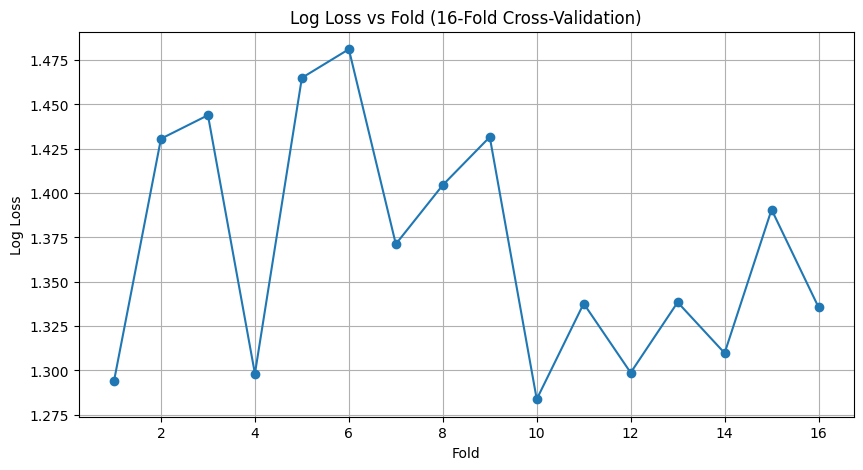

In [31]:
# Plot Log Loss vs Fold
plt.figure(figsize=(10, 5))
plt.plot(range(1, 17), log_losses, marker='o')
plt.xlabel('Fold')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Fold (16-Fold Cross-Validation)')
plt.grid()
plt.show()

In [32]:
# Train-test split for ROC curve calculation
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

# Re-train the model on full training data
model.fit(X_train, y_train.argmax(axis=1))

# Predict probabilities
y_score = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


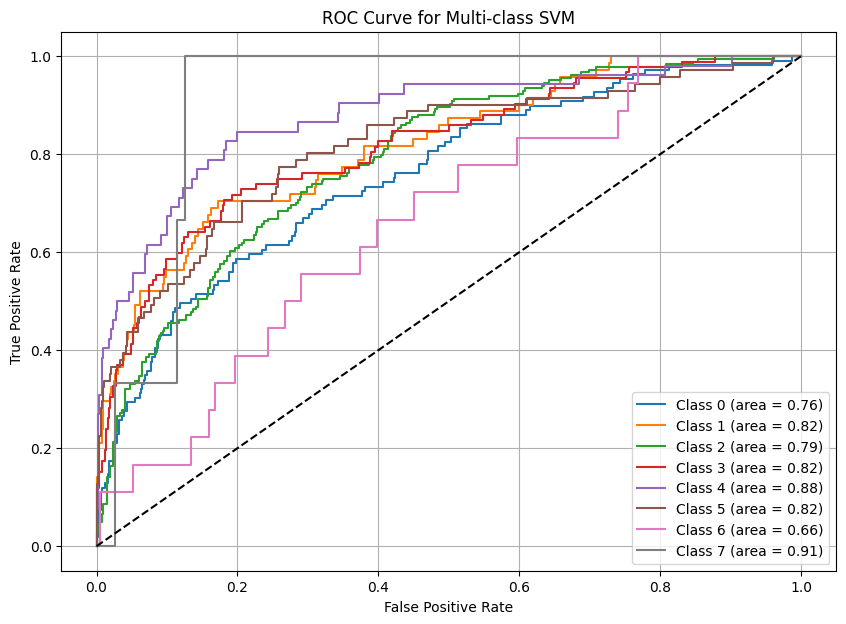

In [33]:
# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class SVM')
plt.legend(loc='lower right')
plt.grid()
plt.show()